In [1]:
rm -rf ~/.cache/matplotlib

In [2]:
!pip install matplotlib --upgrade
!pip install --upgrade numpy scipy cycler

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use("Agg")  # noqa: E402

In [2]:
from scipy.stats import lognorm

# Define parameters for the log-normal distribution
mean = 1.1567 
sigma = 0.05  

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title('Prior $\Theta_{{crit}}$ Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
##Read in the data sets needed. X_1 and X_2 are the training feature data for
##the GPs. Y_1 are the labels for the first GP regression (area estimates), Y_2 are the
##labels for the second GP regression (distance errors)
##########################
#Read in training data X_1, X_2
file_path = 'P1C_GP_Training_Data_Features_X.txt'

X_1 = np.loadtxt(file_path)
X_2 = X_1
#########################
#Read in training labels Y_1 for the Area Growth Values Ag for the 100 tests
file_path = 'P1C_GP_Training_Data_Labels_Y1.txt'

Y_1 = np.loadtxt(file_path)

##########################
#Read in training labels Y_2 for the Mean Distance Errors for the 100 tests
file_path = 'P1C_GP_Training_Data_Labels_Y2.txt'

# Read the data from the file
Y_2 = np.loadtxt(file_path)

#############################
#Read in test data X_Test
file_path = 'P1C_GP_Testing_Data_Features_X.txt'

X_test = np.loadtxt(file_path)
#############################
#Read in test data results Y_Test_1 for the area growth Ag
file_path = 'P1C_GP_Testing_Data_Labels_Y1.txt'

Y_test_1 = np.loadtxt(file_path)
#############################
#Read in test data results Y_test_2 for the mean error
file_path = 'P1C_GP_Testing_Data_Labels_Y2.txt'

Y_test_2 = np.loadtxt(file_path)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e10)) * RBF([1.0, 1.0, 1.0, 1.0], length_scale_bounds=(1e-2, 1e3))

# Create a Gaussian Process Regressor object
gp_1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

# Train the Gaussian Process Regressor
gp_1.fit(X_1, Y_1)



GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1]),
                         n_restarts_optimizer=100)

In [5]:
#Example Predictions from the GP
gp_1.predict(np.array([16.171, 8.729, 0, 1.133]).reshape(1,-1))
gp_1.predict(np.array([18.365, 6.882, 0, 1.221]).reshape(1,-1))
gp_1.predict(np.array([16.401, 8.404, 0, 1.048]).reshape(1,-1))
gp_1.predict(np.array([17.85, 7.732, 0, 1.09]).reshape(1,-1))
gp_1.predict(np.array([16.745, 7.649, 0, 1.167]).reshape(1,-1))

array([2784.85728766])

[3141.784221 2679.538886 3638.421578 2055.141477 3680.77701  3572.025706
 2546.150784 2826.576605 2982.337634 2516.323025 3721.705787 2590.877529
 2588.742444 2526.463952 2772.932726 3555.84823  3843.359363 2921.647141
 2887.8094   2653.955732 3006.336557 3118.002865 3531.166036 3504.335174
 3689.993778]
[-1.81653469e-01 -1.96221609e+01 -4.29280891e+02 -4.45256021e+01
  2.16646510e+01 -2.34025512e+01 -1.52014334e+02 -4.17193173e+01
  1.81120015e+02  1.82008622e+01 -2.78062938e+02  8.32763194e+00
  1.48010502e+01  2.96277674e+02  1.00455981e+02  1.44520477e+01
 -1.65717094e+01 -8.10874330e+01  2.06698625e+02  3.34059913e+01
  4.78810316e+00 -2.24174808e+02  2.54216849e+01 -6.13717118e+01
  1.62876311e+02]


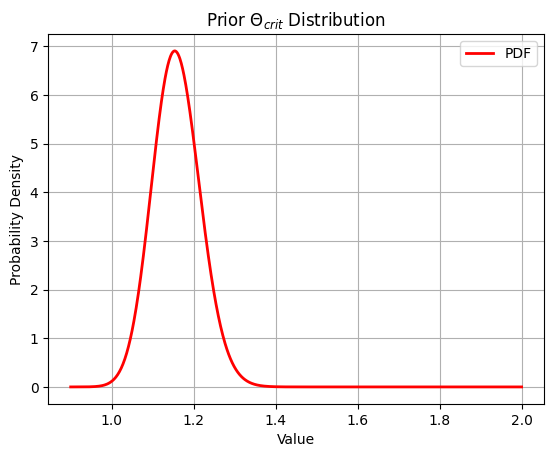

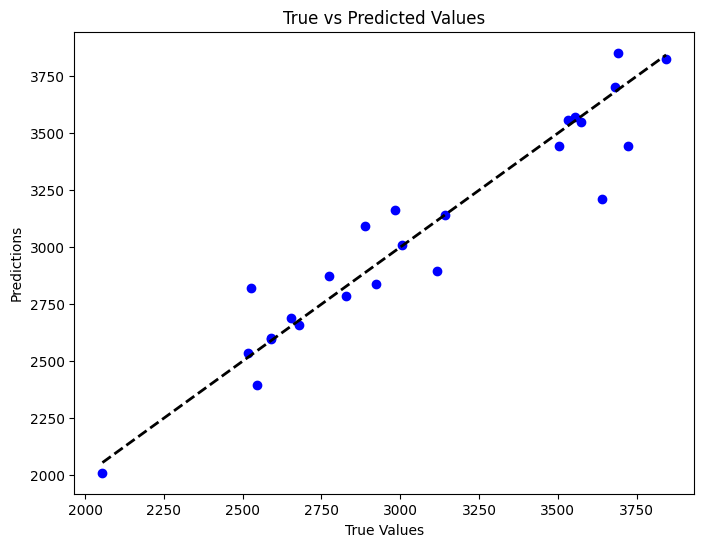

In [6]:
#Plot the performance of GP 1 on the test data
x_pred = X_test
y_pred, sigma = gp_1.predict(x_pred, return_std=True)
print(Y_test_1)
print(y_pred - Y_test_1)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test_1, y_pred, color='blue')
plt.plot([Y_test_1.min(), Y_test_1.max()], [Y_test_1.min(), Y_test_1.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(Y_test_1, y_pred)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm^2")

r_squared = r2_score(Y_test_1, y_pred)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 148.76131663889012 mm^2
R-squared (R²): 0.9063267651117488


In [8]:
#GP 1 Hyperparameters
hyperparameters = gp_1.kernel_.get_params()
print(hyperparameters)


{'k1': 2.02e+03**2, 'k2': RBF(length_scale=[1.46, 11.3, 65.1, 0.486]), 'k1__constant_value': np.float64(4093757.9617630006), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([ 1.45640514, 11.34542931, 65.08411419,  0.48559954]), 'k2__length_scale_bounds': (0.01, 1000.0)}


In [9]:
# Create a Gaussian Process Regressor object
gp_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

# Train the Gaussian Process Regressor
gp_2.fit(X_2, Y_2) #Train the GP on just tol, h, mu data

/home/jlaudo/.local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1]),
                         n_restarts_optimizer=100)

In [10]:
#GP 2 Hyperparameters
hyperparameters_2 = gp_1.kernel_.get_params()
print(hyperparameters_2)


{'k1': 2.02e+03**2, 'k2': RBF(length_scale=[1.46, 11.3, 65.1, 0.486]), 'k1__constant_value': np.float64(4093757.9617630006), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([ 1.45640514, 11.34542931, 65.08411419,  0.48559954]), 'k2__length_scale_bounds': (0.01, 1000.0)}


In [11]:
mse = mean_squared_error(Y_test_2, y_pred_2)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm")

r_squared = r2_score(Y_test_2, y_pred_2)

print("R-squared (R²):", r_squared)

NameError: name 'y_pred_2' is not defined

In [ ]:
#Plot the performance of GP 2 on the test data
x_pred = X_test

y_pred_2, sigma = gp_2.predict(x_pred, return_std=True)
print(X_test)
print(y_pred_2)
print(Y_test_2)
print(y_pred_2 - Y_test_2)
      
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_2, y_pred_2, color='blue')
plt.plot([Y_test_2.min(), Y_test_2.max()], [Y_test_2.min(), Y_test_2.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [ ]:
gp_2.predict(np.array([19.523, 9.343, 14.287, 1.291]).reshape(1,-1))

# Visualize the GP dependencies and calculate the minimum

In [25]:
######## MINIMIZE GP2 Predictions
import numpy as np
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor

#Define bounds for the design space
bounds = [(X_1[:, 0].min(), X_1[:, 0].max()), 
          (X_1[:, 1].min(), X_1[:, 1].max()), 
          (X_1[:, 2].min(), X_1[:, 2].max()), 
          (X_1[:, 3].min(), X_1[:, 3].max())] 

print(bounds)

# Define the objective function: the negative of the predicted mean
def objective_function(x):
    # Reshape x to be 2D array as expected by the predict method
    x = np.array(x).reshape(1, -1)
    # Predict the mean and standard deviation
    mean, std = gp_2.predict(x, return_std=True)
    # We want to minimize the mean, so return the negative mean
    return mean[0]

# Generate 100 random samples within the bounds
random_samples = np.array([np.random.uniform(low=b[0], high=b[1], size=1000) for b in bounds]).T

# Evaluate the objective function for each sample
objective_values = np.array([objective_function(sample) for sample in random_samples])

# Find the index of the minimum objective value
min_index = np.argmin(objective_values)

# Get the sample with the minimum objective value
best_sample = random_samples[min_index]

# Get the minimum prediction value
min_prediction_value = gp_2.predict(best_sample.reshape(1, -1))

print("Minimum prediction value:", min_prediction_value[0])
print("Input at minimum prediction value:", best_sample)

[(np.float64(15.08279468), np.float64(19.622)), (np.float64(4.169), np.float64(9.948)), (np.float64(-14.499), np.float64(14.727)), (np.float64(0.015), np.float64(2.0))]
Minimum prediction value: 1.6321235333467623
Input at minimum prediction value: [18.75131217  9.92854687 13.66666056  1.95756927]


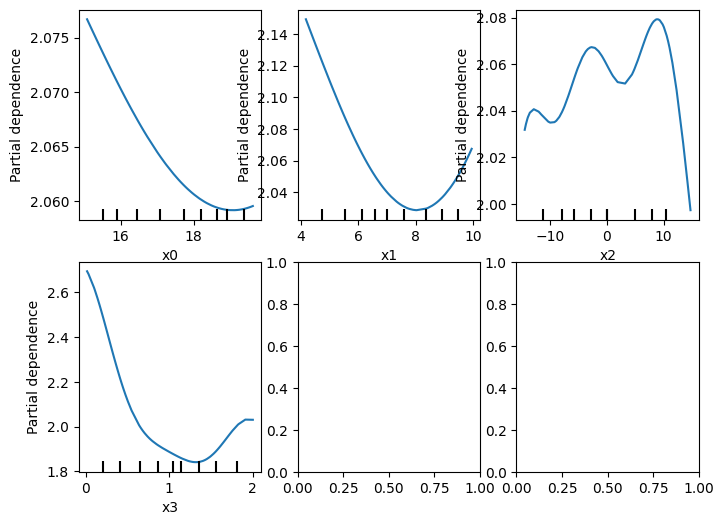

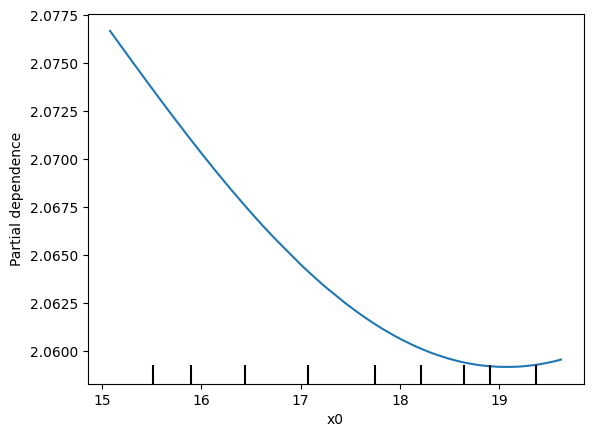

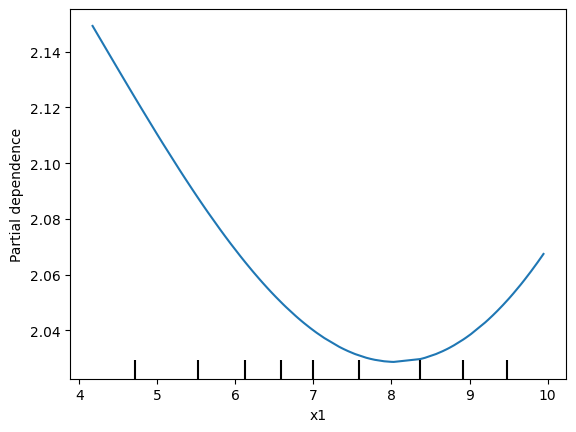

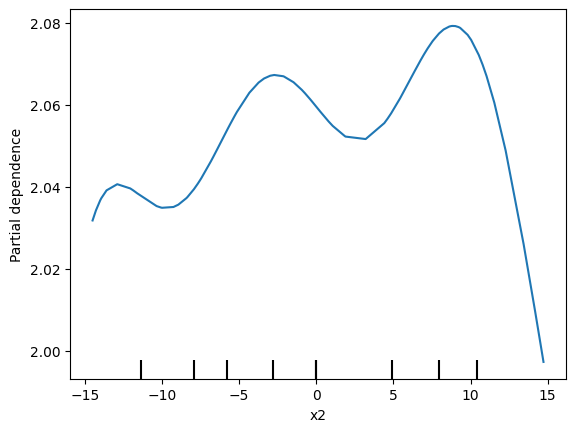

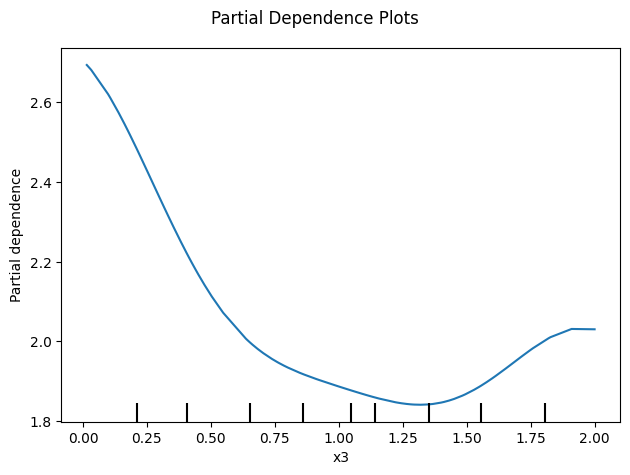

In [26]:
import sklearn.inspection
from sklearn.inspection import PartialDependenceDisplay



# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

x_ranges = [(X_1[:, 0].min(), X_1[:, 0].max()), (X_1[:, 1].min(), X_1[:, 1].max()), (X_1[:, 2].min(), X_1[:, 2].max()), (X_1[:, 3].min(), X_1[:, 3].max())]

# Plot partial dependence for each feature
for i, ax in enumerate(axs.flat):
    if i <4:
      display = PartialDependenceDisplay.from_estimator(gp_2, X_2, features=[i])
      display.plot(ax=ax)

      # Set custom x-axis range for each subplot
      ax.set_xlim(x_ranges[i])

plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

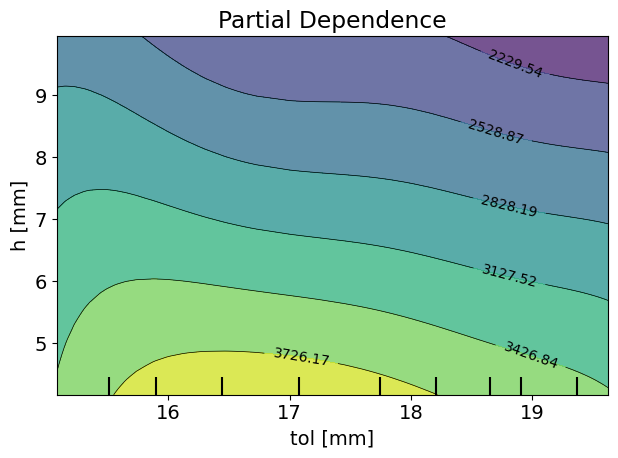

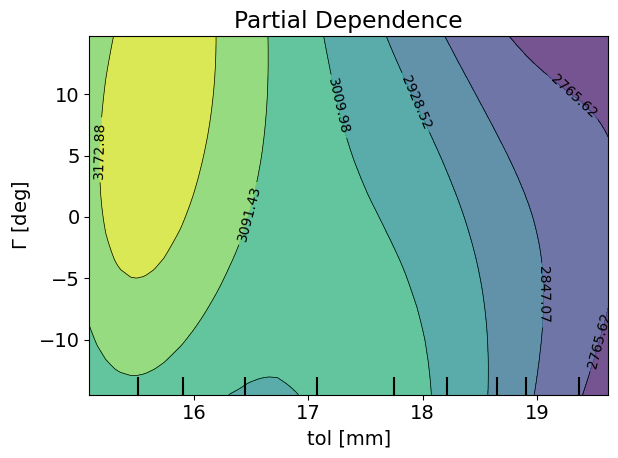

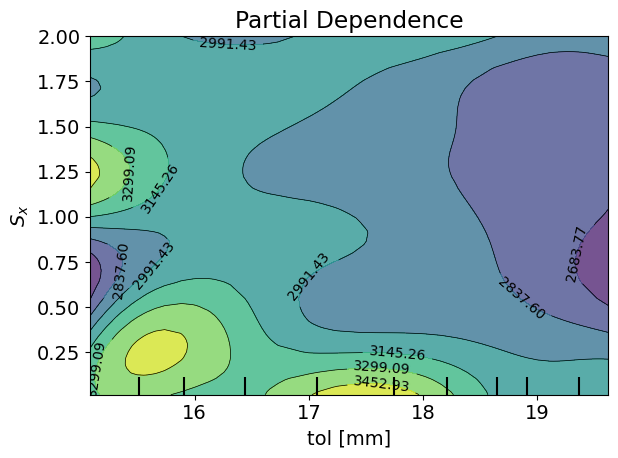

In [30]:
#####Tol Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence

PartialDependenceDisplay.from_estimator(gp_1, X_2, [(0, 1)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(0, 2)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\Gamma$ [deg]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(0, 3)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$S_{x}$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


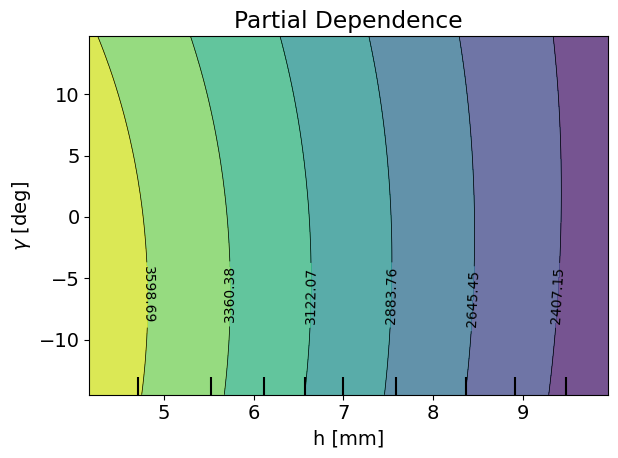

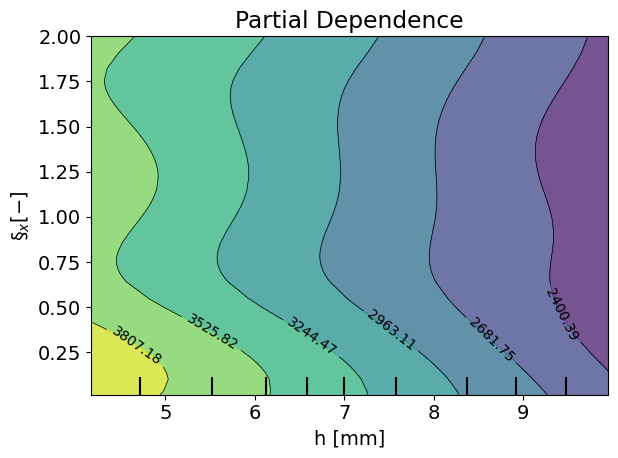

In [31]:
#####h Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(1, 2)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\gamma$ [deg]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(1, 3)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\S_{x} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


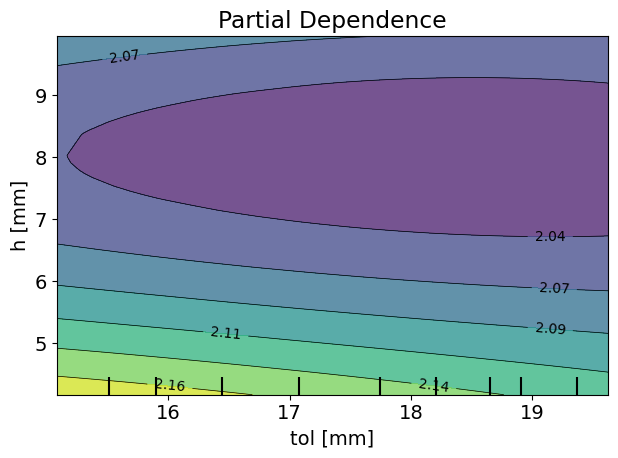

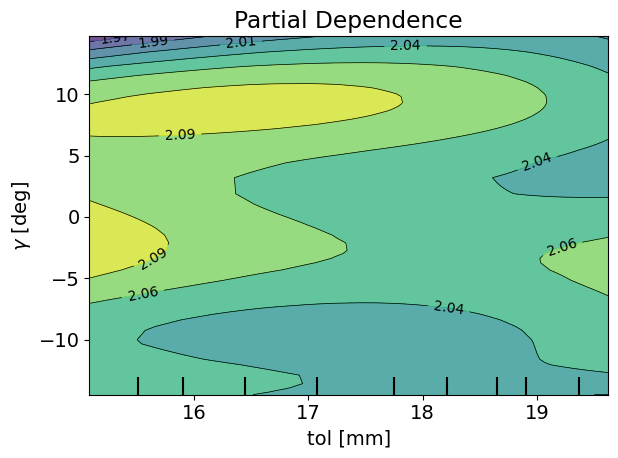

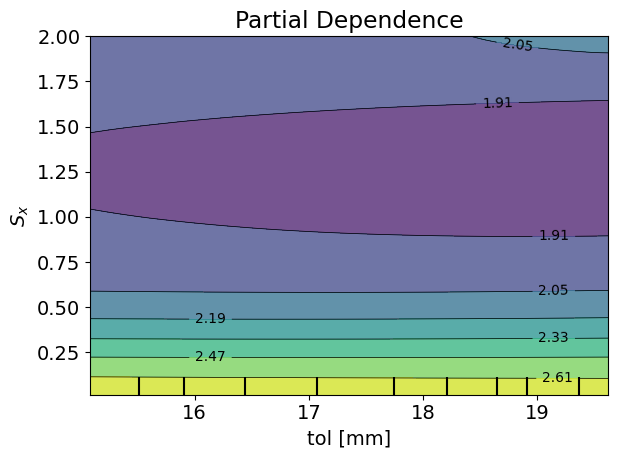

In [32]:
#####Tol Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence

PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 1)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 2)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\gamma$ [deg]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 3)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$S_{x}$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


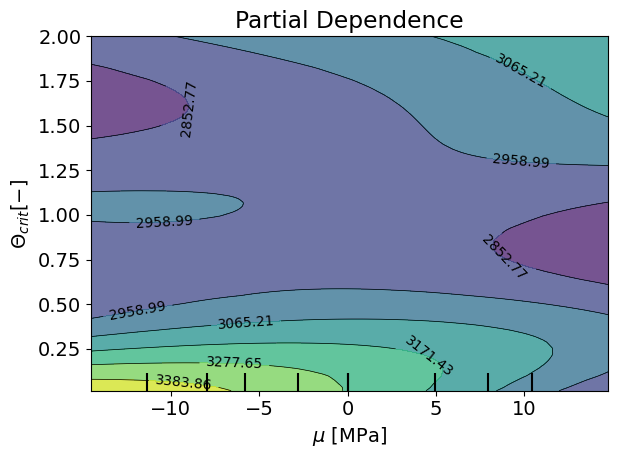

ValueError: All entries of features must be less than len(feature_names) = 4, got 4.

In [33]:
#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(2, 3)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(2, 4)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure tcrit and k
PartialDependenceDisplay.from_estimator(gp_1, X_2, [(3, 4)])
plt.rc('font', size=14)
plt.xlabel('$\Theta_{crit} [-]$')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

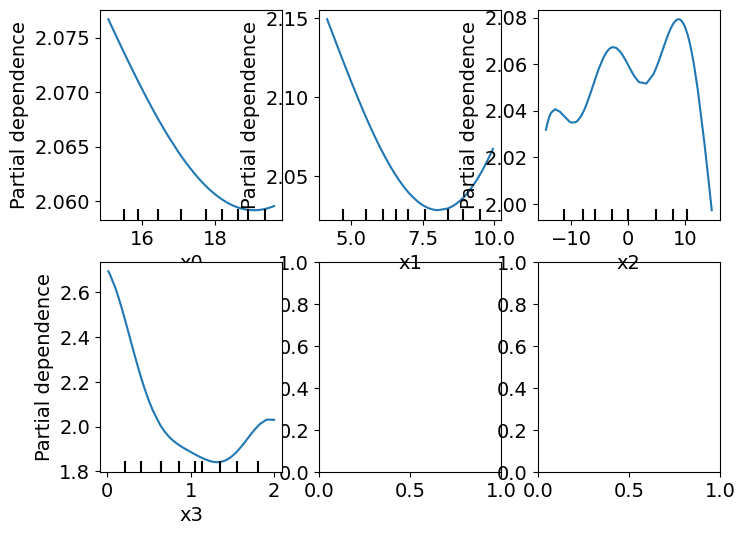

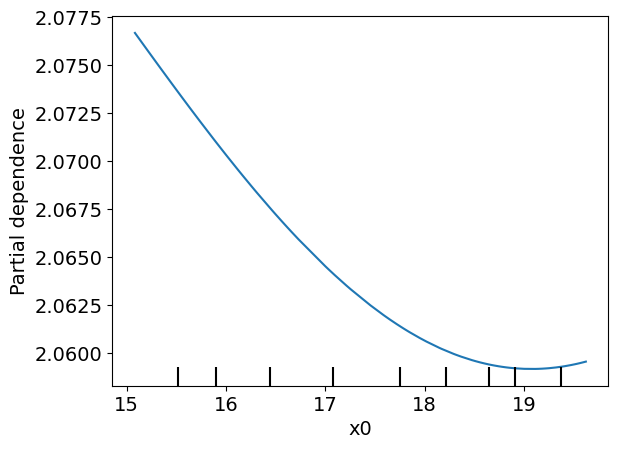

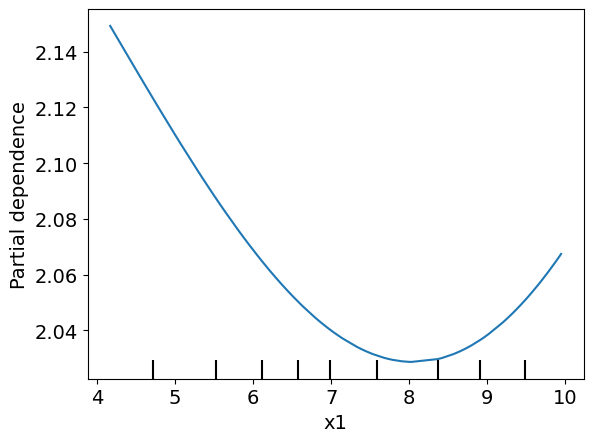

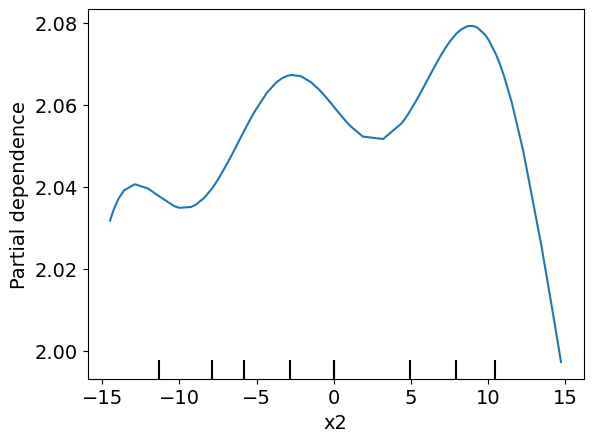

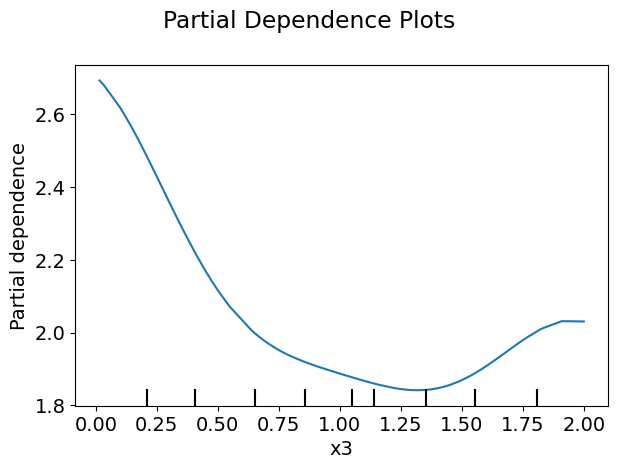

In [34]:
import sklearn.inspection
from sklearn.inspection import PartialDependenceDisplay



# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

x_ranges = [(X_1[:, 0].min(), X_1[:, 0].max()), (X_1[:, 1].min(), X_1[:, 1].max()), (X_1[:, 2].min(), X_1[:, 2].max()), (X_1[:, 3].min(), X_1[:, 3].max())]

# Plot partial dependence for each feature
for i, ax in enumerate(axs.flat):
    if i < 4:
      display = PartialDependenceDisplay.from_estimator(gp_2, X_2, features=[i])
      display.plot(ax=ax)

      # Set custom x-axis range for each subplot
      ax.set_xlim(x_ranges[i])

plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

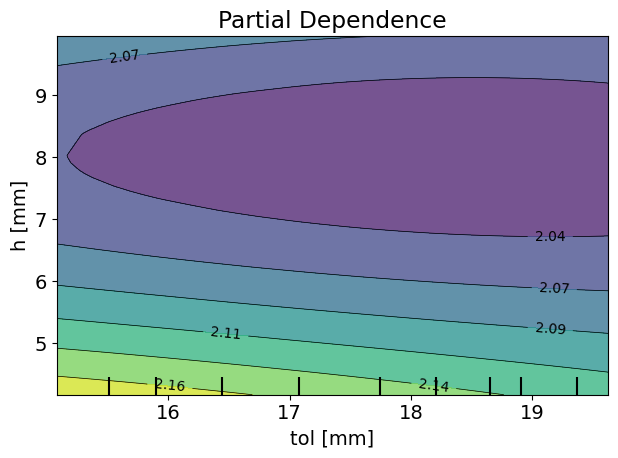

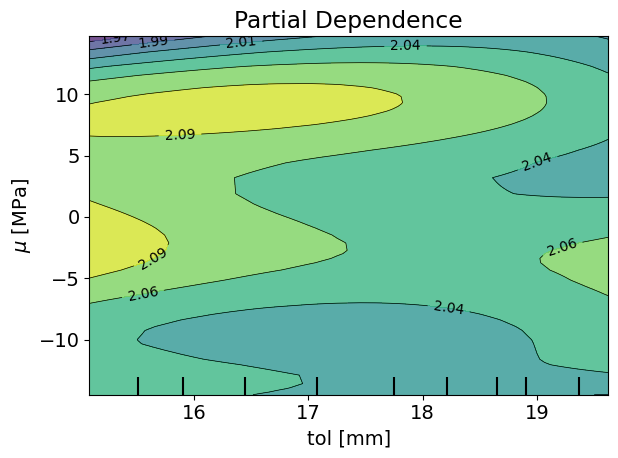

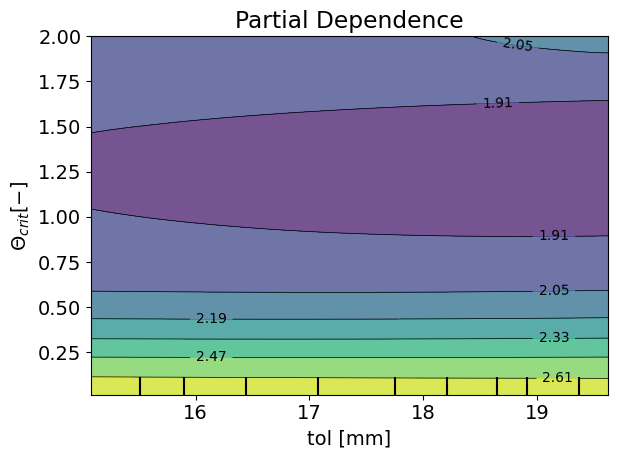

ValueError: All entries of features must be less than len(feature_names) = 4, got 4.

In [35]:
#####Tol Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence

PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 1)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 2)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\mu$ [MPa]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 3)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 4 tol and k
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(0, 4)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

In [ ]:
#####h Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 2)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\mu$ [MPa]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()


#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 3)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(1, 4)])
plt.rc('font', size=14)
plt.xlabel('h [mm]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

In [ ]:
#Figure 2 tol and mu
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(2, 3)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$\Theta_{crit} [-]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure 3 tol and theta crit
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(2, 4)])
plt.rc('font', size=14)
plt.xlabel('$\mu$ [MPa]')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

#Figure tcrit and k
PartialDependenceDisplay.from_estimator(gp_2, X_2, [(3, 4)])
plt.rc('font', size=14)
plt.xlabel('$\Theta_{crit} [-]$')
plt.ylabel('$k [day^{-1}]$')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

In [ ]:
#FUNCTION TO MAP GP OUTPUT INTO A LIKELIHOOD VALUE
def transform_gp_output(area_output, error_output):
    L_list = []
    for i, j in zip(area_output, error_output):
        sigma_1 = 127 #Area measurement uncertainty for area gp
        sigma_2 = 0.26345385/8 #Uncertainty in distance measurement error
        err_min = 1.4913205946367043 #min value of error GP on the input space
        y = 3199.796624 #True Area measured [mm^2]
        
        err_pred = j
        y_pred = i
        #(1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y - (y_pred))**2)/(sigma_1**2))) *  <-Add this to the line below to create the compound likelihood function
        L = (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Prediction        L_list.append(L)
        L_list.append(L)
        L_array = np.array(L_list)
    return L_array

In [ ]:
####TOL and H
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #Gamma range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Sx range


#feature_4_range = np.linspace(1.2, 1.4, 500)
#feature_5_range = np.linspace(1.0, 2, 500)
#Define Grid Values for Feature 1
feature_1_grid, feature_2_grid = np.meshgrid(feature_2_range, feature_1_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [f1, f2, fixed_features[2], fixed_features[3]]
    for f1 in feature_1_range for f2 in feature_2_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(area_predictions)

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_1_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood based on Error')
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

In [ ]:
##h and Sx
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Sx range


#Define Grid Values for Feature 1
feature_2_grid, feature_4_grid = np.meshgrid(feature_4_range, feature_2_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [fixed_features[0], f2, fixed_features[2], f4]
    for f2 in feature_2_range for f4 in feature_4_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(min(area_predictions))

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_4_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$S_{{x}}$')
plt.ylabel('$h$')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

In [ ]:
##h and gamma
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #Gamma range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Sx range


#Define Grid Values for Feature 1
feature_2_grid, feature_3_grid = np.meshgrid(feature_3_range, feature_2_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [fixed_features[0], f2, f3, fixed_features[3]]
    for f2 in feature_2_range for f3 in feature_3_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(min(area_predictions))

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_3_grid, feature_4_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$\Gamma$')
plt.ylabel('$h$')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

In [12]:
pip install emcee

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs00000000145ccf3c00000230'



In [17]:
!pip install --upgrade h5py emcee

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 69.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs000000001053f1dc00000233'



In [13]:
from sklearn.mixture import GaussianMixture
class CustomGMM:
    def __init__(self, n_components=1, **kwargs):
        self.gmm = GaussianMixture(n_components=n_components, **kwargs)

    def fit(self, X):
        self.gmm.fit(X)

    def pdf(self, X):

        return np.exp(self.gmm.score_samples(np.array(X).reshape(-1, 1)))

In [14]:
print(np.random.uniform(1.1, 1.3, 100))

[1.29055827 1.11162421 1.18237147 1.14514647 1.20744059 1.12406106
 1.15796525 1.21880547 1.21069454 1.24576027 1.20163347 1.27145915
 1.14565992 1.23373796 1.21836919 1.21719402 1.22527651 1.1440206
 1.24754963 1.26102017 1.17701306 1.21321821 1.11943925 1.23953931
 1.10190005 1.19577465 1.25075635 1.17942053 1.18745275 1.20336864
 1.19929324 1.10160474 1.26045243 1.24442018 1.13787038 1.29616443
 1.18937091 1.22999466 1.19882588 1.18480815 1.22843998 1.18529877
 1.28038484 1.19974825 1.15401322 1.21342692 1.11821174 1.19056402
 1.21087655 1.29105915 1.2280755  1.12031614 1.1977043  1.21863224
 1.25501016 1.14545481 1.19220701 1.13900612 1.10322978 1.10635263
 1.15478756 1.2687326  1.20716343 1.23063662 1.11186856 1.28939989
 1.28475716 1.1933666  1.2163426  1.24157054 1.27386163 1.21489324
 1.28224197 1.21993514 1.24786311 1.25356289 1.26928794 1.21463027
 1.20016548 1.23577894 1.26830917 1.14902092 1.12026451 1.26638942
 1.19536443 1.28417344 1.2202511  1.2488927  1.25479778 1.17668

In [15]:
hyperparameters = gp_1.kernel_.get_params()

# Print the length scale
print(hyperparameters)

hyperparameters_2 = gp_2.kernel_.get_params()

print(hyperparameters_2)

{'k1': 2.02e+03**2, 'k2': RBF(length_scale=[1.46, 11.3, 65.1, 0.486]), 'k1__constant_value': np.float64(4093757.9617630006), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([ 1.45640514, 11.34542931, 65.08411419,  0.48559954]), 'k2__length_scale_bounds': (0.01, 1000.0)}
{'k1': 1.32**2, 'k2': RBF(length_scale=[12.5, 9.1, 9.07, 0.659]), 'k1__constant_value': np.float64(1.7379503770510476), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([12.49571277,  9.09941545,  9.06678668,  0.65855334]), 'k2__length_scale_bounds': (0.01, 1000.0)}


In [16]:
gp_1._get_param_names()

['alpha',
 'copy_X_train',
 'kernel',
 'n_restarts_optimizer',
 'n_targets',
 'normalize_y',
 'optimizer',
 'random_state']

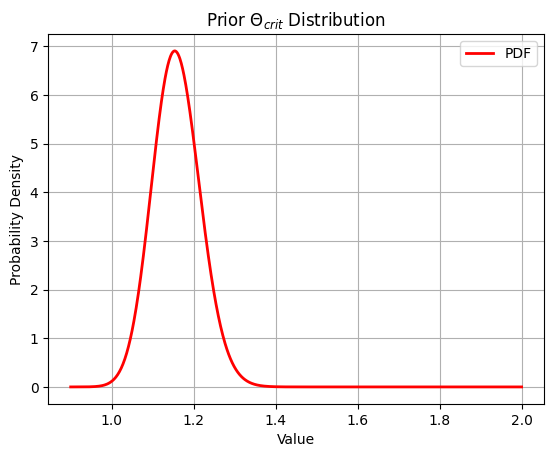

In [17]:
from scipy.stats import lognorm

# Define parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution
sigma = 0.05  # Standard deviation of the logarithm of the distribution

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title('Prior $\Theta_{{crit}}$ Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#code to fix how the gmm pdf evaluates probability densities
def extract_first_item(obj):
    if isinstance(obj, np.ndarray) and obj.size > 0:
        return obj[0]
    else:
        return obj

In [19]:
import numpy as np
from sklearn.mixture import GaussianMixture

class BoundedGMM:
    def __init__(self, gmm, bounds):
        self.gmm = gmm
        self.bounds = bounds

    def score_samples(self, X):
        # Check if samples are within bounds
        in_bounds = np.all((X >= self.bounds[:, 0]) & (X <= self.bounds[:, 1]), axis=1)
        
        # Compute the log likelihood
        log_prob = self.gmm.score_samples(X)
        
        # Set log probability to negative infinity for out-of-bounds samples
        log_prob[~in_bounds] = -np.inf
        
        return log_prob

    def pdf(self, X):
        # Convert log probability to probability
        return np.exp(self.score_samples(X))

# Example data and bounds
X = np.random.randn(100, 1)
bounds = np.array([[-2, 2]])  # Bounds for each feature (dimension)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Create the BoundedGMM wrapper
bounded_gmm = BoundedGMM(gmm, bounds)

# Evaluate the PDF on some new data
new_data = np.array([[-3], [0], [1], [3]])
pdf_values = bounded_gmm.pdf(new_data)

print("New data:", new_data)
print("PDF values:", pdf_values)

New data: [[-3]
 [ 0]
 [ 1]
 [ 3]]
PDF values: [0.         0.32480517 0.28789183 0.        ]


In [23]:

import warnings
import numpy as np
import emcee
import corner

# Filter out runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Function to compute likelihood
def likelihood(X, y, f):
    sigma_1 = 127 #Area measurement uncertainty for area gp
    sigma_2 = 0.26345385/8 #Std. Dev of the error data
    err_min = 1.5 #min value of error GP on the input space
 
  
    y_pred, err_pred = f(X)  # Predicted output from the function f
    #(1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred - y)**2)/(sigma_1**2))) * 
    # Assuming Gaussian likelihood
    likelihood = (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Component
    return likelihood

# Function to compute log posterior
def log_posterior(X, y, f, prior_distributions):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]

    # Compute the likelihood
    likelihood_val = likelihood(X, y, f)
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

# Define your function f that maps inputs X to output y
def f(X):

    y_pred = gp_1.predict(X.reshape(1, -1))
    err_pred = gp_2.predict(X.reshape(1, -1))
    return y_pred, err_pred

from scipy.stats import uniform
from scipy.stats import norm



tol_prior = uniform(loc=15, scale=20 - 15)
h_prior = uniform(loc=4.0, scale=10.0 - 4.0)
Gamma_prior = uniform(loc=-15.0, scale = 15.0 + 15.0)
Sx_prior = uniform(loc=0.0, scale=2.0 - 0.0)


prior_distributions = [tol_prior, h_prior, Gamma_prior, Sx_prior]

# Define the measured output y
y_observed = 3199.796624 #True Growth measured [mm^2]

# Initialize MCMC sampler
nwalkers = 100  # Number of walkers
ndim = 4  # Dimensionality of the parameter space
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(y_observed, f, prior_distributions))

# Run MCMC sampling
nsteps = 35000  # Number of MCMC steps
# Generate random numbers for each column
column1 = np.random.uniform(15, 20, 100)
column2 = np.random.uniform(4.0, 10.0, 100)
column3 = np.random.uniform(-15.0, 15.0, 100)
column4 = np.random.uniform(0.0, 2.0, 100)

# Stack the columns horizontally to create the array

array = np.column_stack((column1, column2, column3, column4))

# Repeat the vector 100 times
initial_positions = array # Initial positions for walkers
step_count = 0

while step_count < nsteps:
    # Run MCMC for a subset of steps
    sampler.run_mcmc(initial_positions, nsteps=1000)


    # Increment step count
    step_count += 1000

    print(f"Completed {step_count} steps out of {nsteps}")

#Specify the thinning factor
thin_factor = 10
# Extract samples from the sampler
samples = sampler.chain[:, 2000::thin_factor, :].reshape((-1, ndim))


Completed 1000 steps out of 35000
Completed 2000 steps out of 35000
Completed 3000 steps out of 35000
Completed 4000 steps out of 35000
Completed 5000 steps out of 35000
Completed 6000 steps out of 35000
Completed 7000 steps out of 35000
Completed 8000 steps out of 35000
Completed 9000 steps out of 35000
Completed 10000 steps out of 35000
Completed 11000 steps out of 35000
Completed 12000 steps out of 35000
Completed 13000 steps out of 35000
Completed 14000 steps out of 35000
Completed 15000 steps out of 35000
Completed 16000 steps out of 35000
Completed 17000 steps out of 35000
Completed 18000 steps out of 35000
Completed 19000 steps out of 35000
Completed 20000 steps out of 35000
Completed 21000 steps out of 35000
Completed 22000 steps out of 35000
Completed 23000 steps out of 35000
Completed 24000 steps out of 35000
Completed 25000 steps out of 35000
Completed 26000 steps out of 35000
Completed 27000 steps out of 35000
Completed 28000 steps out of 35000
Completed 29000 steps out of 

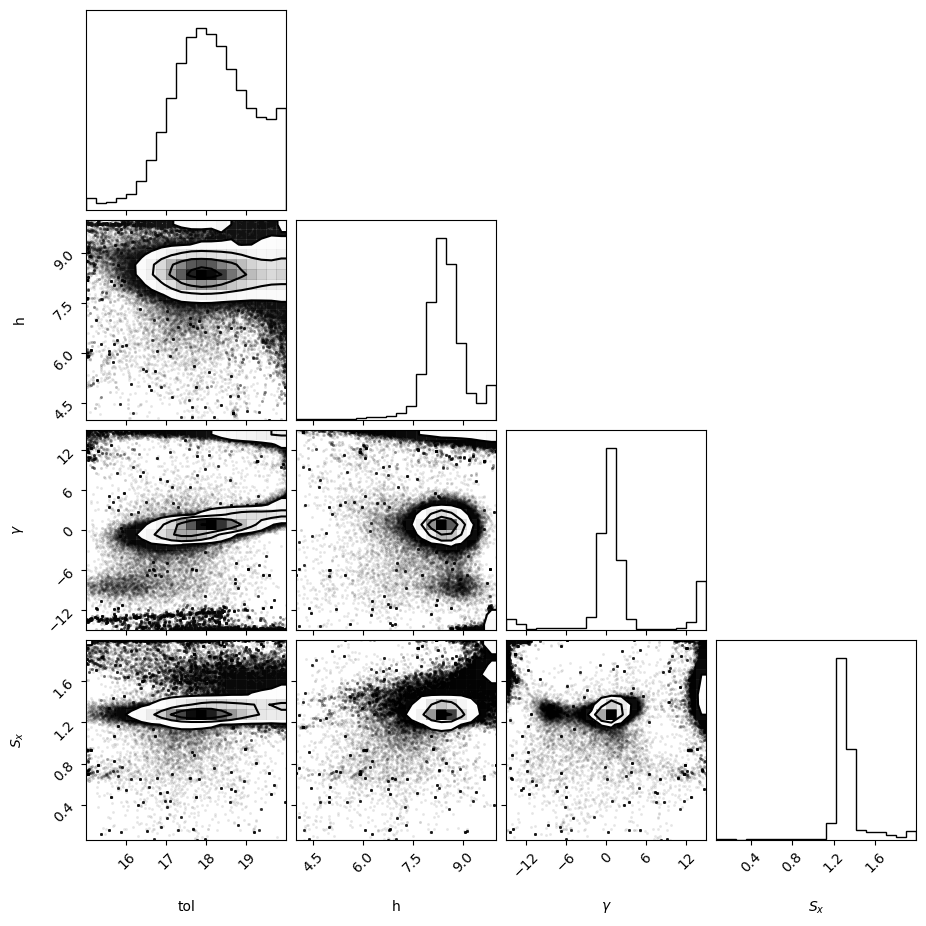

In [24]:
# Create a pair plot using the results from MCMC
fig = corner.corner(samples, labels=["tol", "h", "$\gamma$", "$S_{{x}}$"],
                    truths=[None, None, None, None])

# Show the plot
plt.show()

In [ ]:
ranges = [(15, 25), (1.1, 4.5), (0.1, 1.0), (1.0, 2.25), (0.5, 3.0), (0.0, 1.0)]
# Create a pair plot
fig = corner.corner(pair_plot_samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None], range=ranges)

# Show the plot
plt.show()

In [73]:
output_samples = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    #if gp_2.predict(samples[i,:].reshape(1, -1)) < 1.6:
    output_samples.append(gp_1.predict(samples[i, :].reshape(1, -1)))

230000


In [28]:
np.savetxt("growth_posterior_COMPARE.txt", output_samples)

In [25]:
# Plot histogram
flat_samples = np.concatenate(output_samples)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})

ag_post = plt.figure(figsize=(10, 6))
plt.hist(flat_samples, bins=50, color='k', histtype='step', linewidth=3, density=True, label=r"$p(A^g|\Theta^{crit}, S_f^{sim} \approx S_f^{obs})$")
plt.axvline(x=3199.796624, color='green', linestyle='--', linewidth=6, label="$A^g_{obs}$")

label_font_properties = {'fontsize': 16, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 8, 'fontweight': 'bold'}  # Increase the font size for ticks

    # Set the labels and title
plt.xlabel(label_font_properties)


    # Set the linewidth of the plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)  # Set the desired linewidth

plt.tick_params(axis='both', which='major', labelsize=14)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (if present)

# Adjust layout for better spacing


plt.tight_layout()

# Add labels and title
#xticks = [2000,  2200,  2400, 2600, 2800,  3000, 3200, 3400, 3600,  3800,  4000,  4200]
#plt.xticks(ticks=xticks)
plt.xlim([0,4200])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title(r'$p(A^g|\Theta^{crit}=1.1567, S_f^{sim} \approx S_f^{obs})$ for the Left Breast', fontsize=28)
plt.xlabel('Total Growth $A^g [mm^2]$', fontsize=28)
plt.ylabel('Probability', fontsize=28)

hist, bin_edges = np.histogram(flat_samples, bins=30, density=True)

# Show plot
plt.legend(fontsize=24)
plt.show()


lower_bound = 2589
upper_bound = 2860
# Compute the bin width
bin_width = bin_edges[1] - bin_edges[0]

# Find indices of bins that fall within the bounds
bin_indices = np.where((bin_edges[:-1] >= lower_bound) & (bin_edges[1:] <= upper_bound))[0]

# Calculate the probability of values falling within the bounds
probability = np.sum(hist[bin_indices] * bin_width)
print(probability)

NameError: name 'output_samples' is not defined

In [75]:
ag_post.savefig('P1C_A^g_marginal_plot.png', dpi=200, bbox_inches='tight')

In [84]:
print(np.mean(output_samples))
print(np.median(output_samples))
print(np.std(output_samples))

2481.9538480874717
2467.4083314819727
193.94607099301996


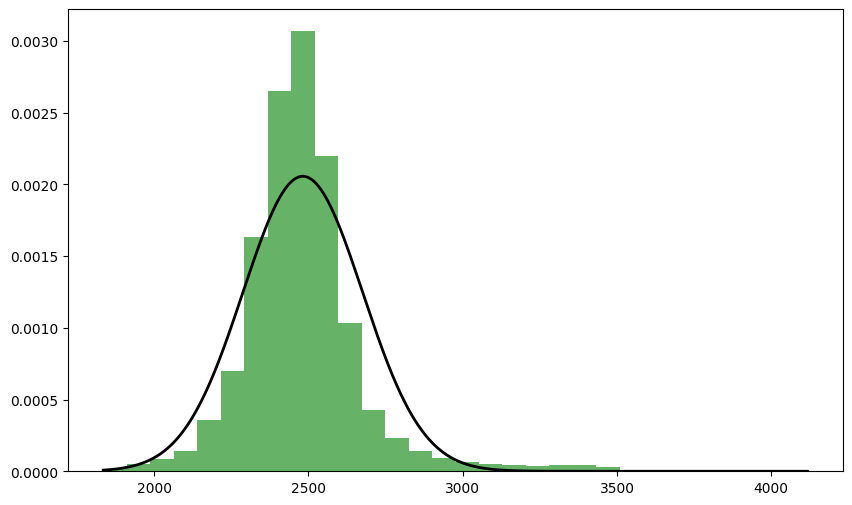

In [79]:
data = flat_samples
mean, std_dev = np.mean(data), np.std(data)

# Create a range of values for plotting the normal distribution
x = np.linspace(min(data) - 1, max(data) + 1, 1000)
pdf = norm.pdf(x, mean, std_dev)  # Probability Density Function

# Plot the data and the fitted normal distribution
plt.figure(figsize=(10, 6))

# Histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Plot the fitted normal distribution
plt.plot(x, pdf, 'k', linewidth=2, label='Fitted Normal Distribution')

In [34]:
output_samples_error = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    output_samples_error.append(gp_2.predict(samples[i, :].reshape(1, -1)))

800000


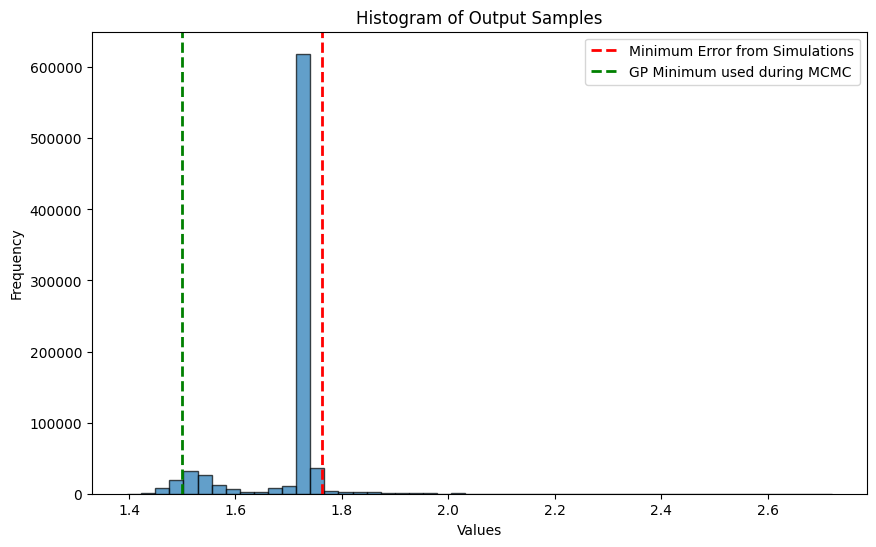

In [44]:
# Plot histogram
flat_samples_error = np.concatenate(output_samples_error)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples_error, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=1.76319, color='red', linestyle='--', linewidth=2, label="Minimum Error from Simulations")
plt.axvline(x=1.5, color='green', linestyle='--', linewidth=2, label="GP Minimum used during MCMC")
# Add labels and title
plt.legend()
plt.title('Histogram of Output Samples')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [287]:
print(np.median(output_samples_error))

1.723896509484348


In [34]:
##########Compute the MAP estimate
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(samples)):
    log_posterior_value = log_posterior(samples[i, :], y_observed, f, prior_distributions)
    log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)

MAP estimate: [19.37591765  8.70306708 14.53569777  1.31754185]


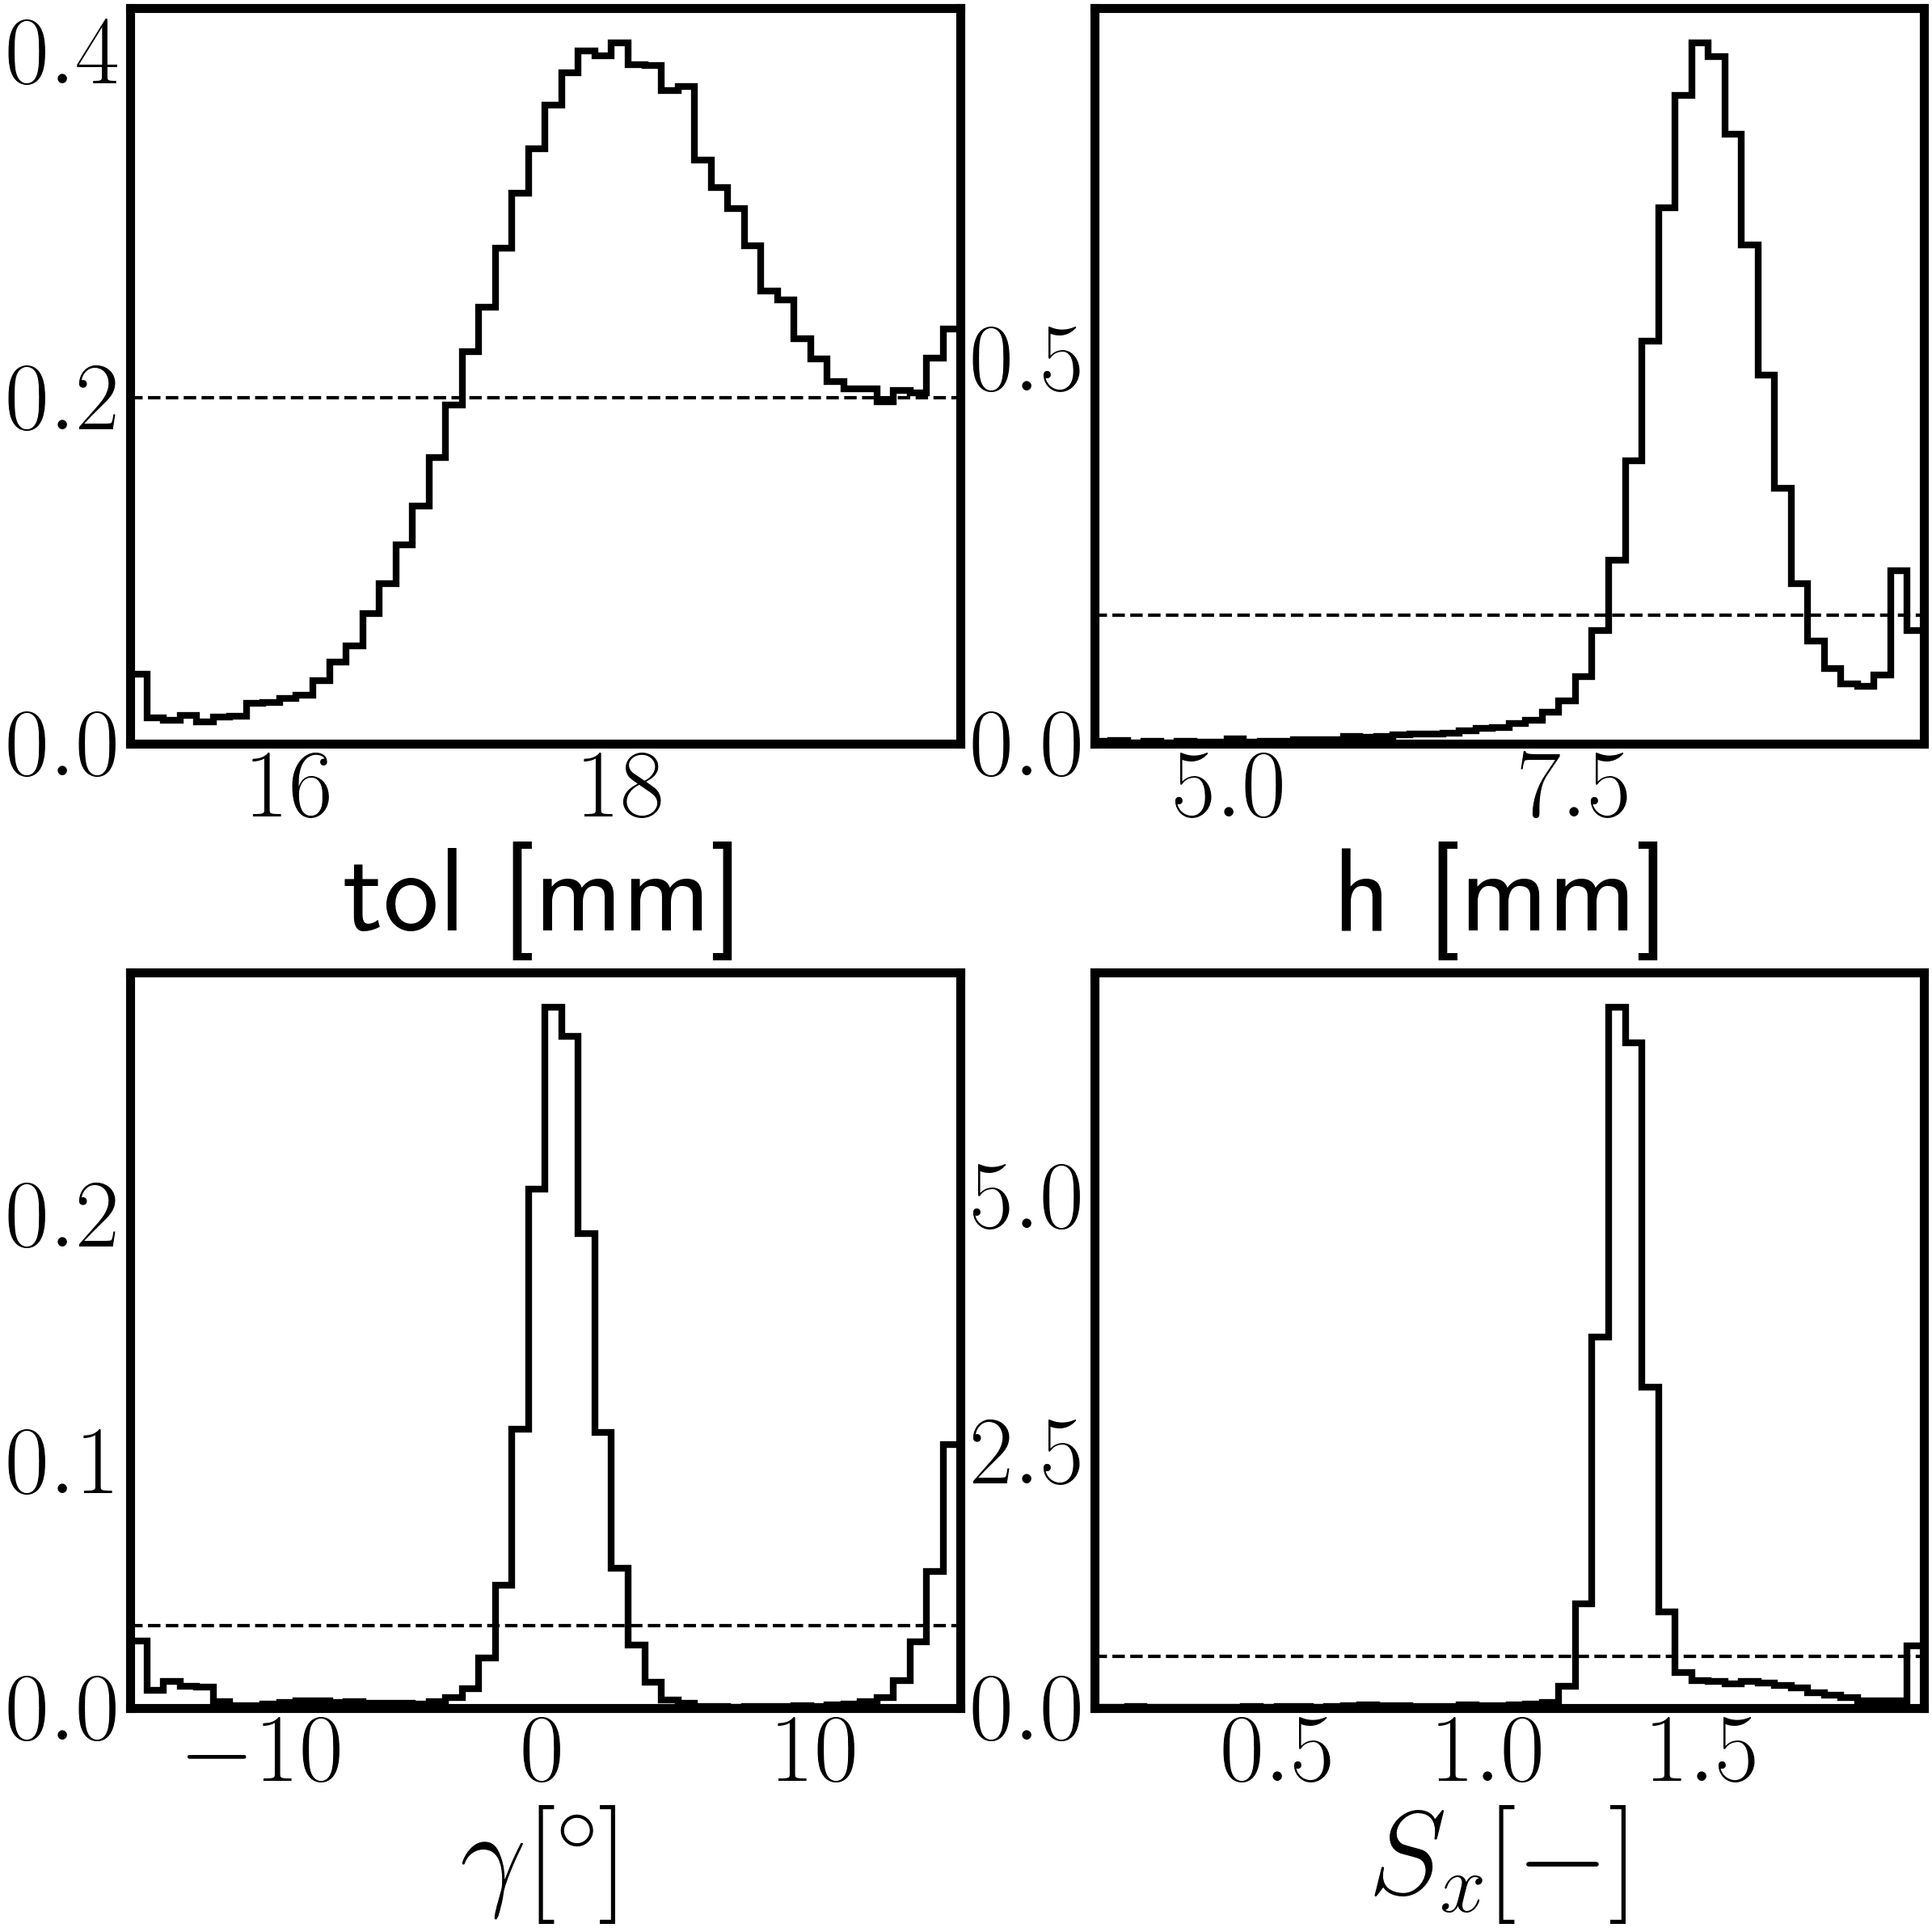

In [26]:

tol_prior = uniform(loc=15, scale=20 - 15)
h_prior = uniform(loc=4.0, scale=10.0 - 4.0)
Gamma_prior = uniform(loc=-15.0, scale = 15.0 + 15.0)
Sx_prior = uniform(loc=0.0, scale=2.0 - 0.0)


prior_distributions = [tol_prior, h_prior, Gamma_prior, Sx_prior]

posterior_samples = samples
priors = [prior for prior in prior_distributions]

# Define labels
labels = ["tol [mm]", "h [mm]",   "$\\gamma [^\circ]$", "$S_x [-]$"]

# Set up font properties
label_font_properties = {'fontsize': 106, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 86, 'fontweight': 'bold'}  # Increase the font size for ticks
plt.rc('text', usetex=True)
# Create a single figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 24))  # Adjust the size as needed

# Manually assign the subplots to match the required order
plot_positions = {
    "tol [mm]": (0, 0),
    "h [mm]": (0, 1),
    "$\\gamma [^\circ]$": (1, 0),
    "$S_x [-]$": (1, 1)
}

# Loop through each parameter and create a subplot in the specified order
for i, label in enumerate(labels):
    row, col = plot_positions[label]
    ax = axes[row, col]

    # Plot the histogram of the posterior samples
    ax.hist(posterior_samples[:, i], bins=50, density=True, color='k', histtype='step', linewidth=6)

    # Define the x range for plotting the prior
    x_min, x_max = posterior_samples[:, i].min(), posterior_samples[:, i].max()
    x = np.linspace(x_min, x_max, 1000)

    # Calculate and plot the prior distribution
    y = priors[i].pdf(x)
    ax.plot(x, y, color='k', linestyle='--', linewidth=3.0)

    # Set the x limits to the data range
    ax.set_xlim(x_min, x_max)

    # Set the labels and title
    ax.set_xlabel(label, label_font_properties)


    # Set the linewidth of the plot border
    for spine in ax.spines.values():
        spine.set_linewidth(8)

    # Apply the font properties to the ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font_properties['fontsize'], width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(tick_font_properties['fontsize'])  # Adjust the size as needed
        tick.set_fontweight(tick_font_properties['fontweight'])

# Adjust layout for better spacing


plt.tight_layout()
# Save the figure with 200 dpi resolution
fig.savefig('P1C_marginal_plots.png', dpi=200, bbox_inches='tight')
plt.show()
# Close the figure to free up memory
plt.close(fig)

In [6]:
import numpy as np
##Read in the data sets needed. X_1 and X_2 are the training feature data for
##the GPs. Y_1 are the labels for the first GP regression (area estimates), Y_2 are the
##labels for the second GP regression (distance errors)
##########################
#Read in training data X_1, X_2
file_path = 'P1C_Round_2_GP_Training_Data_Features_X.txt'

X_1_V2 = np.loadtxt(file_path)
X_2_V2 = X_1_V2
#########################
#Read in training labels Y_1 for the Area Growth Values Ag for the 100 tests
file_path = 'P1C_Round_2_GP_Training_Data_Labels_Y1.txt'

Y_1_V2 = np.loadtxt(file_path)

#############################
#Read in test data X_Test
file_path = 'P1C_Round_2_GP_Testing_Data_Features_X.txt'

X_test_V2 = np.loadtxt(file_path)
#############################
#Read in test data results Y_Test_1 for the area growth Ag
file_path = 'P1C_Round_2_GP_Testing_Data_Labels_Y1.txt'

Y_test_1_V2 = np.loadtxt(file_path)
#############################
#Read in test data results Y_test_2 for the mean error
file_path = 'P1C_GP_Testing_Data_Labels_Y2.txt'

Y_test_2_V2 = np.loadtxt(file_path)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(5, 1e2))

# Create a Gaussian Process Regressor object
gp_1_V2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_1_V2.fit(X_1_V2.reshape(-1,1), Y_1_V2.reshape(-1,1))


/home/jlaudo/.local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 5.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

[1167.75 6419.   6350.25  877.    884.25]


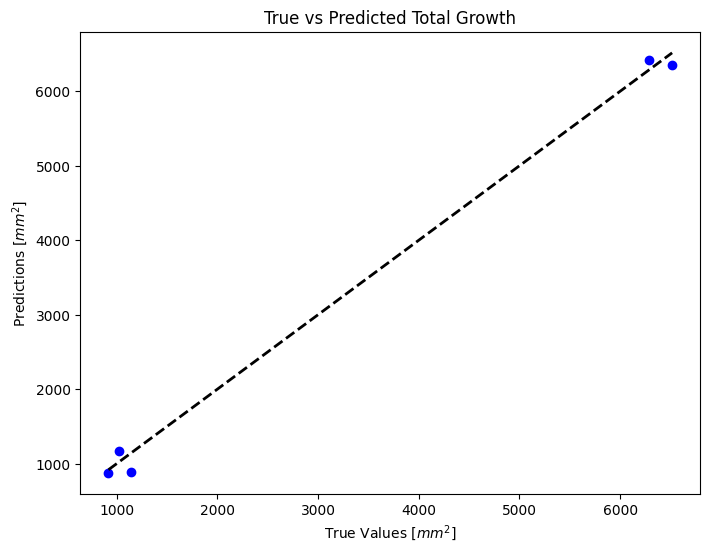

[1.24952416 1.01659818 1.01843815 1.27344783 1.2728807 ]


In [8]:
x_pred_V2 = X_test_V2
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred_V2, sigma_V2 = gp_1_V2.predict(x_pred_V2.reshape(-1,1), return_std=True)
print(y_pred_V2)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_1_V2, y_pred_V2, color='blue')
plt.plot([Y_test_1_V2.min(), Y_test_1_V2.max()], [Y_test_1_V2.min(), Y_test_1_V2.max()], 'k--', lw=2)
plt.xlabel('True Values [$mm^2$]')
plt.ylabel('Predictions [$mm^2$]')
plt.title('True vs Predicted Total Growth')
plt.show()
print(X_test_V2)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(Y_test_1_V2, y_pred_V2)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm^2")

r_squared = r2_score(Y_test_1_V2, y_pred_V2)

print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 164.1395333295342 mm^2
R-squared (R²): 0.9961159448177406


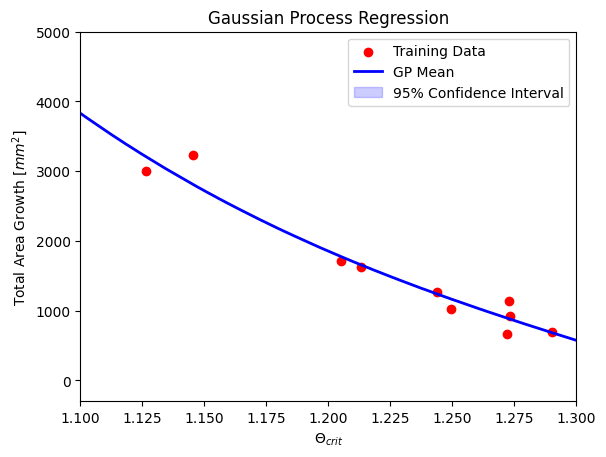

In [10]:
# Generate a dense grid of input points for plotting
X_plot = np.linspace(1.1, 1.3, 500).reshape(-1, 1)

# Make predictions with the GP model
y_mean, y_std = gp_1_V2.predict(X_plot, return_std=True)

y_mean = y_mean.ravel()
y_std = y_std.ravel()
# Plot the training data
plt.scatter(X_1_V2, Y_1_V2, color='red', label='Training Data')

# Plot the mean prediction on top
plt.plot(X_plot, y_mean, color='blue', lw=2, label='GP Mean')

# Plot the confidence intervals
plt.fill_between(X_plot.ravel(), y_mean - 1.96 * y_std, y_mean + 1.96 * y_std, color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and legend
plt.xlabel('$\Theta_{crit}$')
plt.xlim([1.1, 1.3])
plt.ylim([-300, 5000])
plt.ylabel('Total Area Growth [$mm^2$]')
plt.legend()
plt.title('Gaussian Process Regression')
plt.show()

In [11]:
gp_1_V2.predict(np.array(1.1567).reshape(-1,1))

array([2592.5])

In [12]:
!pip install emcee
!pip install corner

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [13]:
#code to fix how the gmm pdf evaluates probability densities
def extract_first_item(obj):
    if isinstance(obj, np.ndarray) and obj.size > 0:
        return obj[0]
    else:
        return obj

Completed 1000 steps out of 25000
Completed 2000 steps out of 25000
Completed 3000 steps out of 25000
Completed 4000 steps out of 25000
Completed 5000 steps out of 25000
Completed 6000 steps out of 25000
Completed 7000 steps out of 25000
Completed 8000 steps out of 25000
Completed 9000 steps out of 25000
Completed 10000 steps out of 25000
Completed 11000 steps out of 25000
Completed 12000 steps out of 25000
Completed 13000 steps out of 25000
Completed 14000 steps out of 25000
Completed 15000 steps out of 25000
Completed 16000 steps out of 25000
Completed 17000 steps out of 25000
Completed 18000 steps out of 25000
Completed 19000 steps out of 25000
Completed 20000 steps out of 25000
Completed 21000 steps out of 25000
Completed 22000 steps out of 25000
Completed 23000 steps out of 25000
Completed 24000 steps out of 25000
Completed 25000 steps out of 25000
[[1.16285445]
 [1.24279908]
 [1.13640681]
 ...
 [1.12282328]
 [1.14047467]
 [1.12040701]]


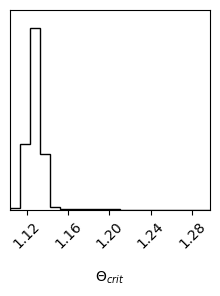

In [14]:
####Second Round of MCMC Regression

import warnings
import numpy as np
import emcee
import corner

# Filter out runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Function to compute likelihood
def likelihood(X, y, f):
    sigma_1 = 127 #Area measurement uncertainty for area gp
  
    y_pred = f(X)  # Predicted output from the function f

    #(1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred - y)**2)/(sigma_1**2))) *
    # Assuming Gaussian likelihood
    likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred - y)**2)/(sigma_1**2))) # Likelihood function with just Growth 

    return likelihood
# Function to compute log posterior
def log_posterior(X, y, f, prior_distributions):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]
    
    # Compute the likelihood
    likelihood_val = likelihood(X, y, f)
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

# Define your function f that maps inputs X to output y
def f(X):

    y_pred = gp_1_V2.predict(X.reshape(1, -1))
   
    return y_pred

from scipy.stats import uniform
from scipy.stats import norm, lognorm

# Define parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution
sigma = 0.05  # Standard deviation of the logarithm of the distribution

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)

prior_distributions = [Theta_crit_prior]
# Define the measured output y
y_observed = 3199.796624 #True Growth measured [mm^2]

# Initialize MCMC sampler
nwalkers = 10  # Number of walkers
ndim = 1  # Dimensionality of the parameter space
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(y_observed, f, prior_distributions))

# Run MCMC sampling
nsteps = 25000  # Number of MCMC steps
# Generate random numbers for each column
column1 = np.random.uniform(1.1, 1.3, (nwalkers, ndim))

# Stack the columns horizontally to create the array

array = column1

# Repeat the vector 100 times
initial_positions = array # Initial positions for walkers
step_count = 0

while step_count < nsteps:
    # Run MCMC for a subset of steps
    sampler.run_mcmc(initial_positions, nsteps=1000)


    # Increment step count
    step_count += 1000

    # You can perform any desired operations or monitoring here
    # Example: Print the current step count every 100 steps
    print(f"Completed {step_count} steps out of {nsteps}")

    
#Define a sample thining factor
thin_factor = 10

# Extract samples from the sampler
samples_V2 = sampler.chain[:, 2000::thin_factor, :].reshape((-1, ndim))


# Extract samples from the sampler
pair_plot_samples = sampler.get_chain(flat=True)
print(pair_plot_samples)
# Create a pair plot
fig = corner.corner(pair_plot_samples, labels=["$\Theta_{crit}$"],
                    truths=[None])

# Show the plot
plt.show()

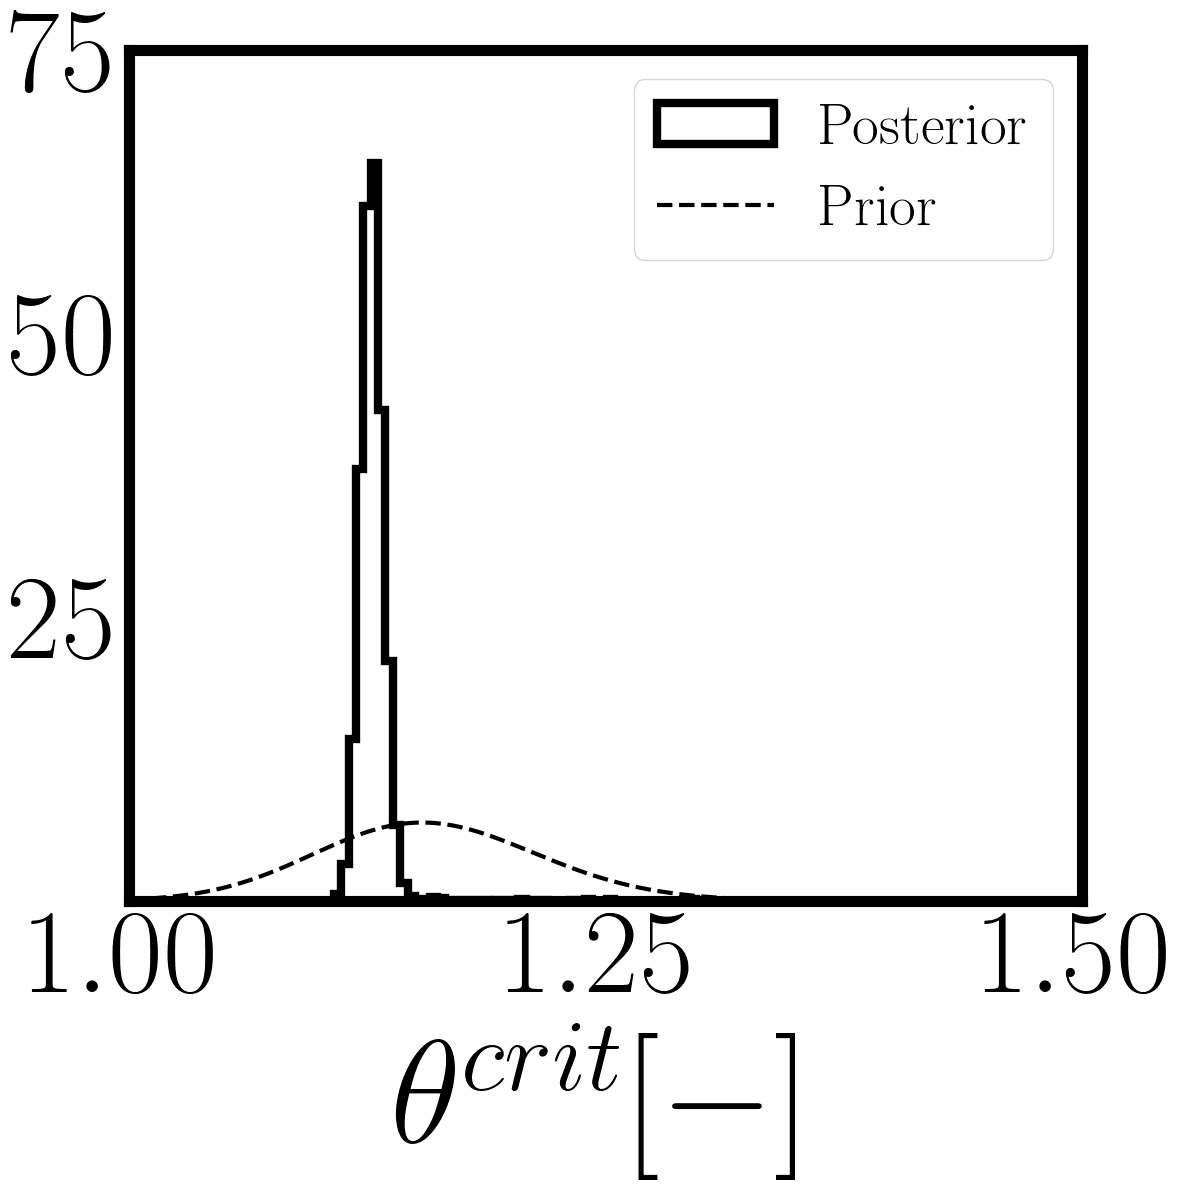

In [15]:
# Assuming posterior_samples and priors are already defined
posterior_samples = samples_V2
priors = [prior for prior in prior_distributions]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})
# Define labels
labels = ["$\\theta^{crit} [-]$"]

# Set up font properties
label_font_properties = {'fontsize': 106, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 86, 'fontweight': 'bold'}  # Increase the font size for ticks

# Create a single figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 12))  # Adjust the size as needed

# Manually assign the subplots to match the required order
plot_positions = {
    "$\\theta^{crit} [-]$": (0, 0)
}

# Loop through each parameter and create a subplot in the specified order
for i, label in enumerate(labels):
    row, col = plot_positions[label]
    ax=axes
    # Plot the histogram of the posterior samples
    ax.hist(posterior_samples[:, i], bins=50, density=True, color='k', histtype='step', linewidth=6, label='Posterior')

    # Define the x range for plotting the prior
    x_min, x_max = 1.0, 1.5
    
    #x_min = 1.0 #Manually set x_min
    
    x = np.linspace(x_min, x_max, 1000)

    # Calculate and plot the prior distribution
    y = priors[i].pdf(x)
    ax.plot(x, y, color='k', linestyle='--', linewidth=3.0, label='Prior')

    # Set the x limits to the data range
    ax.set_xlim(x_min, x_max)

    # Set the labels and title
    ax.set_xlabel(label, label_font_properties)


    # Set the linewidth of the plot border
    for spine in ax.spines.values():
        spine.set_linewidth(8)

    # Apply the font properties to the ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font_properties['fontsize'], width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(tick_font_properties['fontsize'])  # Adjust the size as needed
        tick.set_fontweight(tick_font_properties['fontweight'])

# Adjust layout for better spacing
# Get current ticks
yticks = ax.get_yticks()

# Remove the first tick
new_yticks = yticks[1:]

# Set new ticks
ax.set_yticks(new_yticks)
plt.legend(prop={'size':42})
plt.tight_layout()
# Save the figure with 200 dpi resolution
fig.savefig('P1C_marginal_plot_TCRIT.png', dpi=200, bbox_inches='tight')
plt.show()
# Close the figure to free up memory
plt.close(fig)

In [69]:
output_samples_V2 = []
n_samples = samples_V2[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    output_samples_V2.append(gp_1_V2.predict(samples_V2[i, :].reshape(1, -1)))

23000


1.158594625125711
3168.3833019701087


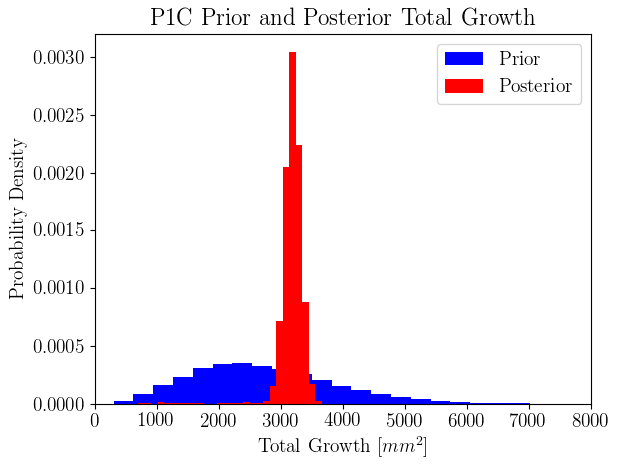

In [70]:
# Parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution

sigma = 0.05  # Standard deviation of the underlying normal

# Generate samples from the log-normal Theta_crit prior distribution
Theta_crit_prior_points = lognorm.rvs(s=sigma, scale=mean, size=100000)

prior_area_estimates = []
for i in Theta_crit_prior_points:
    prior_area_estimates.append(gp_1_V2.predict(i.reshape(-1,1)))

plt.hist(np.concatenate(prior_area_estimates), bins=30, color="blue", density=True, label="Prior")
plt.hist(np.concatenate(output_samples_V2), bins=30, color="red", density=True, label="Posterior")
plt.legend()
plt.xlim([0, 8000])
plt.xlabel("Total Growth [$mm^2$]")
plt.ylabel("Probability Density")
plt.title("P1C Prior and Posterior Total Growth")
print(np.mean(Theta_crit_prior_points))
print(np.mean(output_samples_V2))
plt.show()

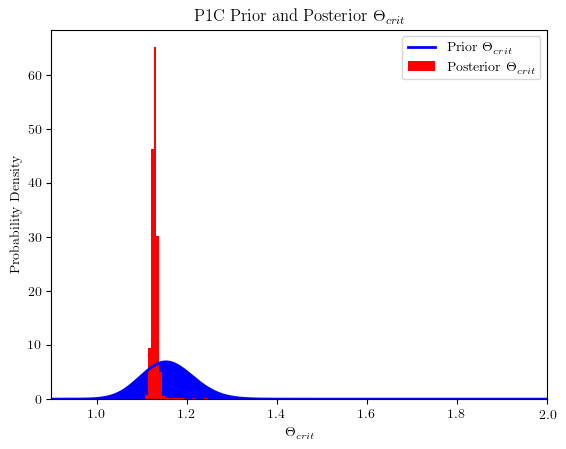

In [19]:
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'b-', lw=2, label='Prior $\Theta_{crit}$')
plt.fill_between(x,pdf,color="b")
plt.hist(samples_V2, color="red", bins=30, density=True, label="Posterior $\Theta_{crit}$")
plt.xlim([0.9, 2.0])
plt.legend()
plt.title("P1C Prior and Posterior $\Theta_{crit}$")
plt.xlabel("$\Theta_{crit}$")
plt.ylabel("Probability Density")
plt.show()

In [16]:
print(np.mean(np.concatenate(samples_V2)))

1.1281953193233147


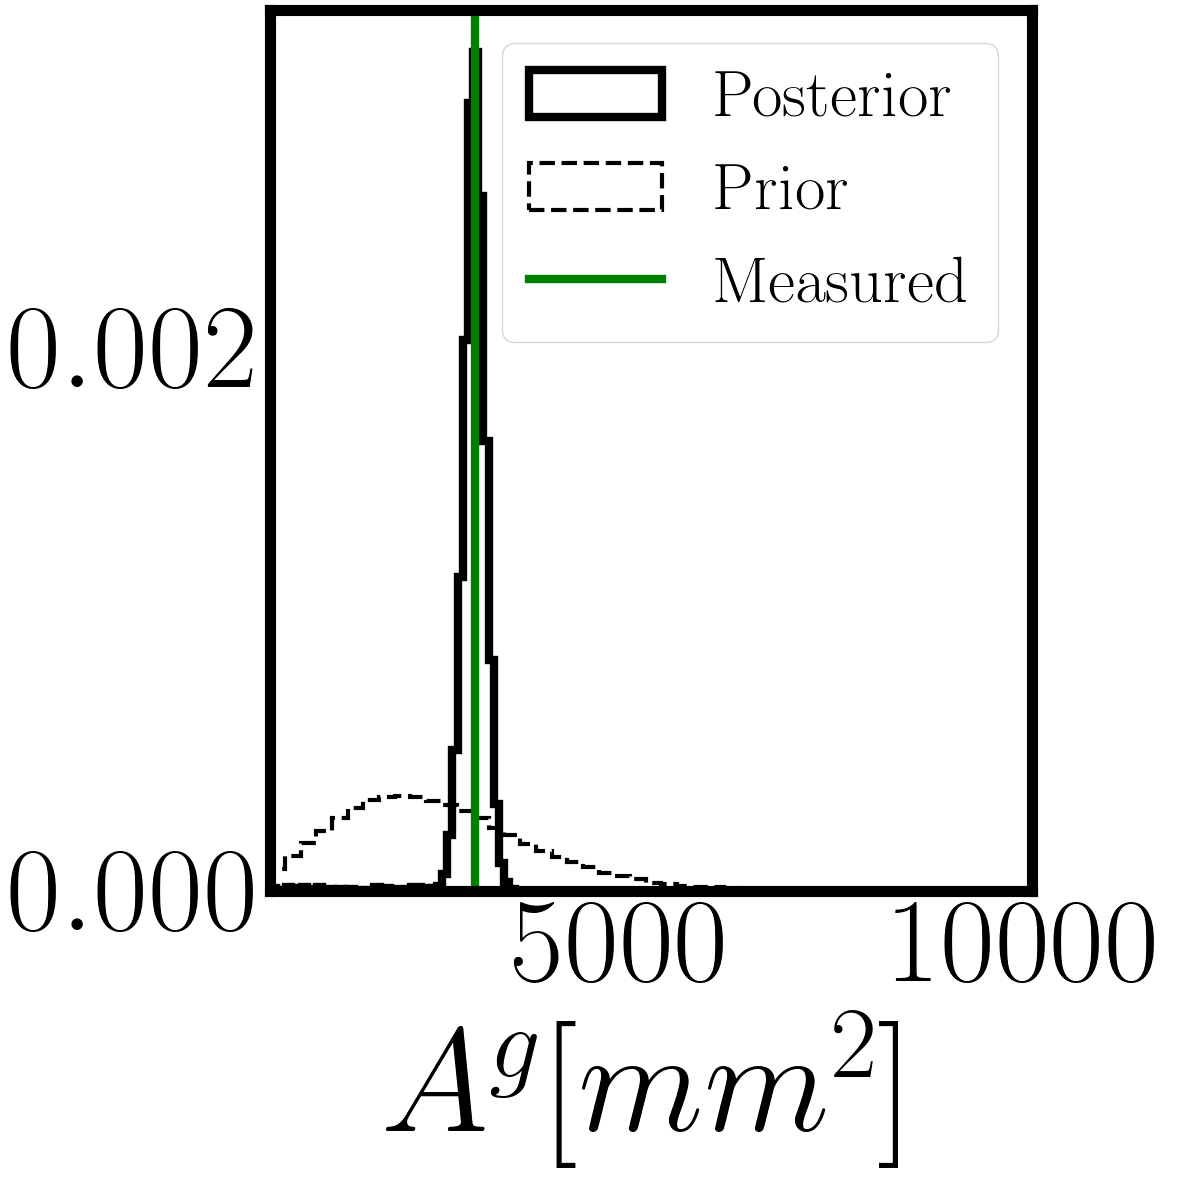

In [71]:
#Generate Posterior Growth Plots
posterior_samples = output_samples_V2
priors = prior_area_estimates
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})
# Define labels
labels = ["$A^g [mm^2]$"]

# Set up font properties
label_font_properties = {'fontsize': 106, 'fontweight': 'bold'}  # Increase the font size
tick_font_properties = {'fontsize': 86, 'fontweight': 'bold'}  # Increase the font size for ticks

# Create a single figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 12))  # Adjust the size as needed

# Manually assign the subplots to match the required order
plot_positions = {
    "$A^g [mm^2]$": (0, 0)
}

# Loop through each parameter and create a subplot in the specified order
for i, label in enumerate(labels):
    row, col = plot_positions[label]
    ax=axes
    # Plot the histogram of the posterior samples
    ax.hist(np.concatenate(posterior_samples), bins=50, density=True, color='k', histtype='step', linewidth=6, label='Posterior')

    # Define the x range for plotting the prior
    x_min, x_max = np.array(posterior_samples[:]).min(), 10000
    
    #x_min = 1.0 #Manually set x_min
    
    

    # Calculate and plot the prior distribution
    y = np.concatenate(priors)
    ax.hist(y, color='k', histtype='step', bins=50, linestyle='--', density=True, linewidth=3.0, label='Prior')

    # Set the x limits to the data range
    ax.set_xlim(x_min, x_max)

    # Set the labels and title
    ax.set_xlabel(label, label_font_properties)


    # Set the linewidth of the plot border
    for spine in ax.spines.values():
        spine.set_linewidth(8)

    # Apply the font properties to the ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font_properties['fontsize'], width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(tick_font_properties['fontsize'])  # Adjust the size as needed
        tick.set_fontweight(tick_font_properties['fontweight'])

# Adjust layout for better spacing
specific_value = 3199.796624
plt.axvline(x=specific_value, color='green', linestyle='-', linewidth=6, label=f'Measured')


plt.tight_layout()
plt.legend(prop={'size': 48})
# Save the figure with 200 dpi resolution
fig.savefig('P1C_marginal_plot_GROWTH_CONDITIONED_ON_TCRIT.png', dpi=200, bbox_inches='tight')
plt.show()
# Close the figure to free up memory
plt.close(fig)

15


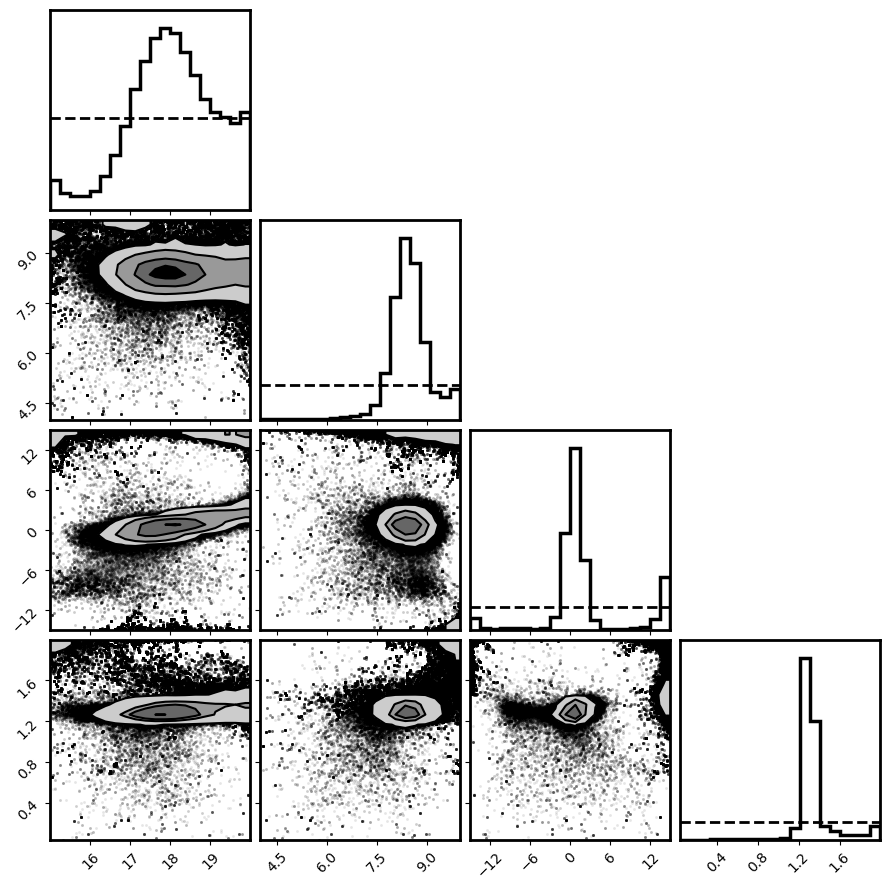

In [33]:
# Example posterior data from MCMC
np.random.seed(42)
posterior_samples = samples

fig = corner.corner(posterior_samples, color= 'k', title_kwargs={"fontsize": 12}, fill_contours=True,hist_kwargs={'density': True, 'linewidth': 2.5})

# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

# Extract the axes from the corner plot
axes = np.array(fig.axes).reshape((4, 4))

tol_prior = uniform(loc=15, scale=20 - 15)
h_prior = uniform(loc=4.0, scale=10.0 - 4.0)
Theta_prior = uniform(loc=-15.0, scale = 15.0 + 15.0)
Sx_prior = uniform(loc=0.0, scale=2.0 - 0.0)


priors = [tol_prior, h_prior, Theta_prior, Sx_prior]
print(priors[0].kwds['loc'])
# Overlay the priors on the diagonal subplots
for i in range(4):
    ax = axes[i, i]
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000)
    
    # Create a uniform distribution over the range of the axis limits
    loc = priors[i].kwds['loc']
    scale = priors[i].kwds['scale']
    y = priors[i].pdf(x)

    # Plot the uniform distribution
    ax.plot(x, y, color='k', linestyle='--', linewidth=2.0)
    
axes = np.array(fig.axes).reshape((4, 4))  # Reshape axes into a 3x3 grid
for ax_row in axes:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # Set the linewidth of each subplot's border
plt.show()

15


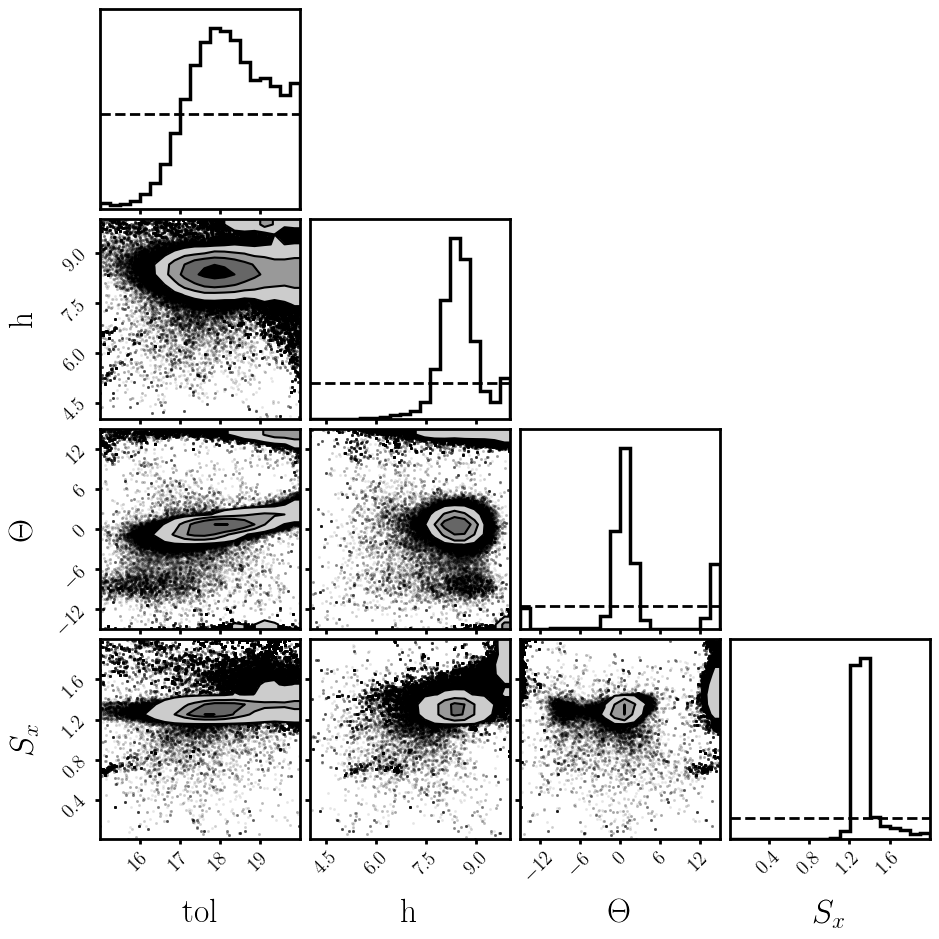

<Figure size 640x480 with 0 Axes>

In [27]:
posterior_samples = samples

fig = corner.corner(posterior_samples, color= 'k', 
                    labels=["tol", "h", "$\Theta$", "$S_{{x}}$"], 
                    title_kwargs={"fontsize": 12}, fill_contours=True, 
                    label_kwargs={"fontsize": 38, "fontweight": "bold"}, 
                    hist_kwargs={'density': True, 'linewidth': 2.5})


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)  # Adjust the size as needed
font_properties = {'weight': 'bold', 'size': 24}  # Adjust the size as needed
# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

# Extract the axes from the corner plot
axes = np.array(fig.axes).reshape((4, 4))

print(priors[0].kwds['loc'])
# Overlay the priors on the diagonal subplots
for i in range(4):
    ax = axes[i, i]
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000)
    

    y = priors[i].pdf(x)

    # Plot the uniform distribution
    ax.plot(x, y, color='k', linestyle='--', linewidth=2.0)
    
axes = np.array(fig.axes).reshape((4, 4))  # Reshape axes into a 3x3 grid
for ax_row in axes:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # Set the linewidth of each subplot's border
            # Set font properties for labels and ticks


# Apply the font properties to all text elements in the plot
for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontdict=font_properties)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font_properties)
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(14)  # Adjust the size as needed
        tick.set_fontweight('bold')

# Show the plot
plt.show()
plt.savefig("P1C Posterior Geometry Histograms", dpi=200)

In [35]:
print(samples.shape)

(800000, 4)


In [36]:
np.random.seed(42)

# Generate 30 random samples between 1 and 800,000
new_samples = np.random.randint(1, 800001, 30)

In [37]:
print(new_samples)

[121959 671156 131933 365839 259179 644168 110269 732181  54887 137338
 521431  87499 175204 191336 278168  41091 329366  64821 787202 321880
 718316 327070 776998 199042 791744 103356 235797 214177 184780 347450]


In [38]:
print(samples[new_samples,:])

[[ 1.89400604e+01  7.74931188e+00  1.48039136e+01  1.38536658e+00]
 [ 1.79188988e+01  9.98257327e+00 -1.47676317e+01  1.47134316e+00]
 [ 1.75943267e+01  9.12193860e+00  6.29424568e-01  1.39333478e+00]
 [ 1.88609958e+01  8.87613836e+00  1.82572423e+00  1.34915573e+00]
 [ 1.99736919e+01  8.20839007e+00  3.16637574e+00  1.33057950e+00]
 [ 1.65688404e+01  8.62466822e+00 -3.20980003e-01  1.28350196e+00]
 [ 1.83497658e+01  8.27201479e+00  3.37708635e-01  1.29398784e+00]
 [ 1.75563856e+01  8.03929809e+00 -5.73390578e-01  1.21711635e+00]
 [ 1.81157770e+01  8.86383868e+00  1.49274932e+01  1.51958708e+00]
 [ 1.85368542e+01  8.05346177e+00  3.74836801e-01  1.26564430e+00]
 [ 1.85396015e+01  8.13427910e+00  9.25980097e-01  1.35604824e+00]
 [ 1.84020180e+01  8.74022283e+00  1.49452929e+01  1.44354387e+00]
 [ 1.88222557e+01  8.10733170e+00  2.94447349e+00  1.31369815e+00]
 [ 1.74297446e+01  9.01839811e+00 -1.19005294e+00  1.21816251e+00]
 [ 1.88461976e+01  8.24301394e+00  1.19547831e+00  1.34495771e

In [50]:
new_design_labels = np.arange(1,31)
print(new_design_labels)
new_posterior_sim_samples = np.zeros((30,5))
new_posterior_sim_samples[:,1:] = samples[new_samples,:]
new_posterior_sim_samples[:, 0] = new_design_labels 
np.savetxt("P1C_sample_tcrit_new_samples.txt", new_posterior_sim_samples)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [52]:
np.savetxt("P1C_sample_tcrit_new_samples.csv", new_posterior_sim_samples, delimiter=',')

In [58]:
np.random.seed(42122)

# Generate 30 random samples from 1.0 to 1.3
samples_new_tcrit = np.random.uniform(1.0, 1.3, 30)
print(samples_new_tcrit)

[1.21332211 1.27191754 1.1000213  1.05522538 1.17083991 1.25267938
 1.16481886 1.19846565 1.24952416 1.06785318 1.18945734 1.27666637
 1.20982951 1.26976204 1.29032749 1.01659818 1.14539544 1.09532565
 1.24388952 1.2728807  1.29980249 1.06000156 1.08652305 1.21299808
 1.23840266 1.20519528 1.00701886 1.27344783 1.12658534 1.01843815]


In [60]:
np.savetxt("New_tcrit_30_samples.txt", samples_new_tcrit)

In [57]:
# Parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution

sigma = 0.05  # Shape parameter (standard deviation of the underlying normal distribution)
  # Scale parameter (exp(mean of the underlying normal distribution))

# Generate 1000 samples from a log-normal distribution
Theta_crit_prior_points = lognorm.rvs(s=sigma, scale=mean, size=30)
print(Theta_crit_prior_points)

[1.1494572  1.08361559 1.16157371 1.15632685 1.2445467  1.18408984
 1.0973136  1.15417166 1.12642838 1.17073217 1.15830491 1.16847462
 1.1569015  1.1628294  1.24131231 1.10104731 1.08474577 1.19827776
 1.1527696  1.16870263 1.16341664 1.2358372  1.28153434 1.10836987
 1.09829372 1.15046979 1.04568062 1.11143943 1.15095475 1.27551164]
